In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tesla = yf.download('TSLA','2022-04-13','2023-04-13')  #downloading Tesla 1 year historical data

[*********************100%***********************]  1 of 1 completed


In [3]:
apple = yf.download('AAPL','2022-04-13','2023-04-13')  #downloading Apple 1 year historical data

[*********************100%***********************]  1 of 1 completed


In [4]:
#data summary to check for any Null or NaN values
tesla.info()
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-04-13 to 2023-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-04-13 to 2023-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [5]:
tesla['Adj Close prev'] = 0 #created a new column to copy previous day data Adj Close data
#print(tesla)

In [6]:
tesla.iloc[1:250, 6] = tesla.iloc[0:249, 4] #copying the previous day Adj close data
#print(tesla)

In [7]:
tesla['Returns'] = tesla['Adj Close'] - tesla['Adj Close prev'] #calculating the per day Returns and adding it to a new column
#print(tesla)

In [8]:
tesla.iloc[0, 7] = 0 #assigning first row to 0 as data before 2022-04-13 not included
#print(tesla)

In [9]:
tesla['Returns 500L'] = 500 * tesla['Returns'] #calculating returns of 500 Long shares
print(tesla)

                  Open        High         Low       Close   Adj Close   
Date                                                                     
2022-04-13  327.026672  342.079987  324.366669  340.790009  340.790009  \
2022-04-14  333.096680  337.570007  327.396667  328.333344  328.333344   
2022-04-18  329.676666  338.306671  324.470001  334.763336  334.763336   
2022-04-19  335.019989  344.980011  331.776672  342.716675  342.716675   
2022-04-20  343.333344  344.666656  325.083344  325.733337  325.733337   
...                ...         ...         ...         ...         ...   
2023-04-05  190.520004  190.679993  183.759995  185.520004  185.520004   
2023-04-06  183.080002  186.389999  179.740005  185.059998  185.059998   
2023-04-10  179.940002  185.100006  176.110001  184.509995  184.509995   
2023-04-11  186.690002  189.190002  185.649994  186.789993  186.789993   
2023-04-12  190.740005  191.580002  180.309998  180.539993  180.539993   

               Volume  Adj Close prev

In [10]:
#following the same steps for 100 Long Apple shares
apple['Adj Close prev'] = 0 
apple.iloc[1:len(apple.index), 6] = apple.iloc[0:len(apple.index)-1, 4] 
apple['Returns'] = apple['Adj Close'] - apple['Adj Close prev'] 
apple.iloc[0, 7] = 0 
no = 100
apple['Returns '+str(no)+'L'] = no * apple['Returns'] 
print(apple)

                  Open        High         Low       Close   Adj Close   
Date                                                                     
2022-04-13  167.389999  171.039993  166.770004  170.399994  169.373962  \
2022-04-14  170.619995  171.270004  165.039993  165.289993  164.294754   
2022-04-18  163.919998  166.600006  163.570007  165.070007  164.076096   
2022-04-19  165.020004  167.820007  163.910004  167.399994  166.392059   
2022-04-20  168.759995  168.880005  166.100006  167.229996  166.223068   
...                ...         ...         ...         ...         ...   
2023-04-05  164.740005  165.050003  161.800003  163.759995  163.759995   
2023-04-06  162.429993  164.960007  162.000000  164.660004  164.660004   
2023-04-10  161.419998  162.029999  160.080002  162.029999  162.029999   
2023-04-11  162.350006  162.360001  160.509995  160.800003  160.800003   
2023-04-12  161.220001  162.059998  159.779999  160.100006  160.100006   

              Volume  Adj Close prev 

In [11]:
TeslaTotalReturn = tesla['Returns 500L'].sum()
AppleTotalReturn = apple['Returns 100L'].sum()
#print("Tesla Total Returns:", TeslaTotalReturn, "Apple Total Returns:", AppleTotalReturn)
print("Net Return:", TeslaTotalReturn+AppleTotalReturn)

Net Return: -81052.40325927734


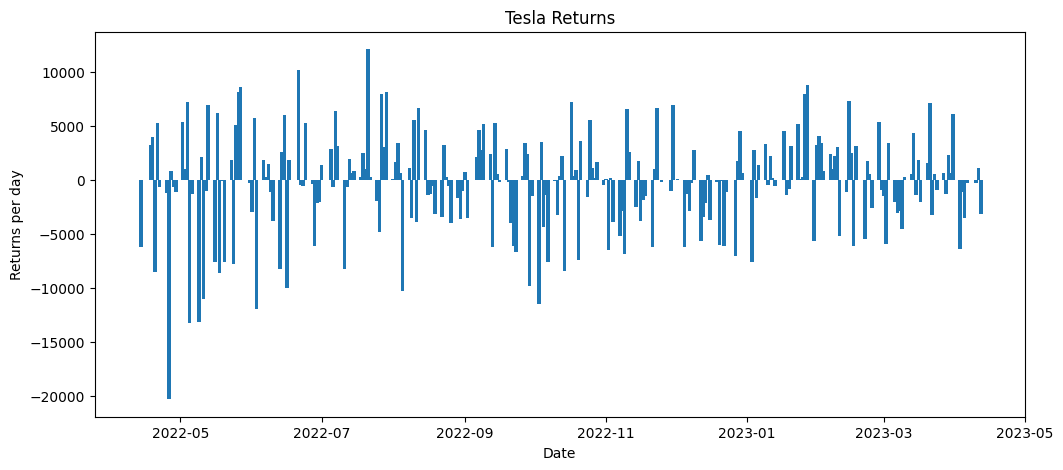

In [12]:
fig = plt.figure(figsize = (12, 5))
plt.bar(tesla.index, tesla["Returns 500L"], width = 1.5)
plt.title('Tesla Returns')
plt.xlabel('Date')
plt.ylabel('Returns per day')
plt.show(block=True)

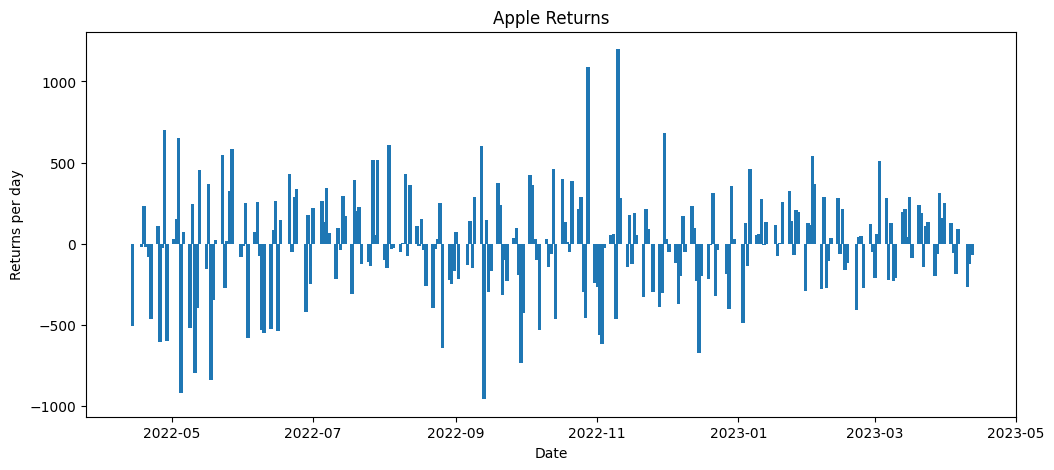

In [13]:
fig = plt.figure(figsize = (12, 5))
plt.bar(apple.index, apple["Returns 100L"], width = 1.5)
plt.title('Apple Returns')
plt.xlabel('Date')
plt.ylabel('Returns per day')
plt.show(block=True)

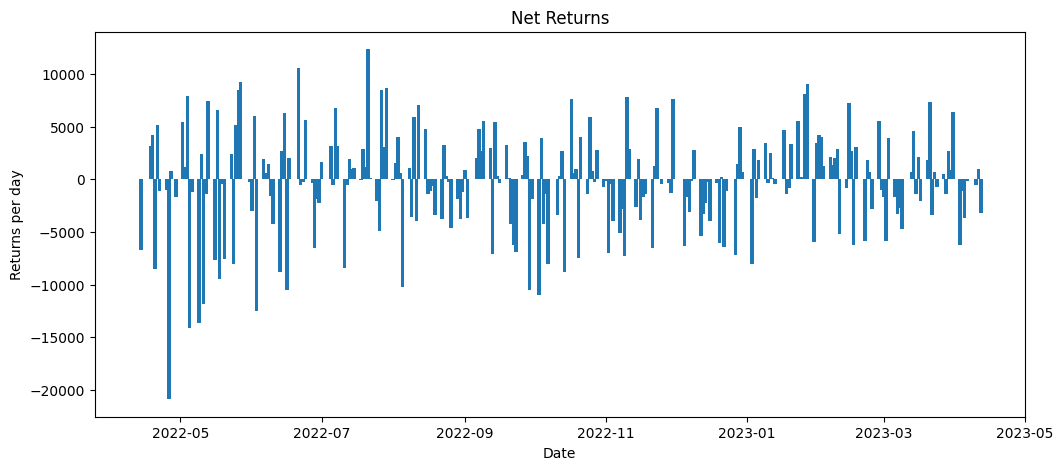

In [14]:
fig = plt.figure(figsize = (12, 5))
plt.bar(apple.index, apple["Returns 100L"]+tesla["Returns 500L"], width = 1.5)
plt.title('Net Returns')
plt.xlabel('Date')
plt.ylabel('Returns per day')
plt.show(block=True)